In [22]:
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.misc

In [23]:
def load_data(dataset):
    ''' Loads the dataset

    :type dataset: string
    :param dataset: the path to the dataset (here MNIST)
    
    copied from http://deeplearning.net/ and revised by hchoi
    '''

    # Download the MNIST dataset if it is not present
    data_dir, data_file = os.path.split(dataset)
    if data_dir == "" and not os.path.isfile(dataset):
        # Check if dataset is in the data directory.
        new_path = os.path.join(
            os.path.split(__file__)[0],
            dataset
        )
        if os.path.isfile(new_path) or data_file == 'mnist.pkl.gz':
            dataset = new_path

    if (not os.path.isfile(dataset)) and data_file == 'mnist.pkl.gz':
        from six.moves import urllib
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('... loading data')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
    # train_set, valid_set, test_set format: tuple(input, target)
    # input is a numpy.ndarray of 2 dimensions (a matrix)
    # where each row corresponds to an example. target is a
    # numpy.ndarray of 1 dimension (vector) that has the same length as
    # the number of rows in the input. It should give the target
    # to the example with the same index in the input.

    return train_set, valid_set, test_set

In [24]:
train_set, val_set, test_set = load_data('mnist.pkl.gz')

... loading data


In [25]:
train_x, train_y = train_set

mean_X = train_x.mean(axis = 0)
var_X = train_x.var(axis = 0)

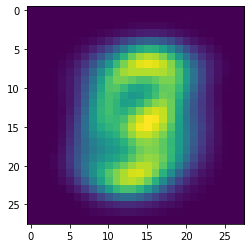

In [26]:
tmp_img1 = mean_X.reshape((28,28)) * 255.9
tmp_img2 = var_X.reshape((28,28)) * 255.9

mean_img = Image.fromarray(tmp_img1.astype(np.uint8))
var_img = Image.fromarray(tmp_img2.astype(np.uint8))

plt.imshow(mean_img)

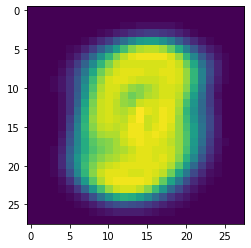

In [27]:
plt.imshow(var_img)

In [28]:
cov = np.cov(train_x.T)
eigval, eigvec = np.linalg.eig(cov)
eigvec = eigvec.T

/home/babjinny/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


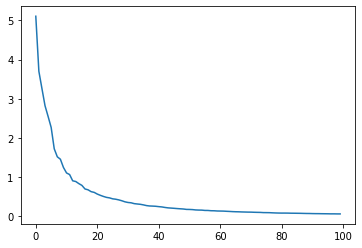

In [49]:
plt.plot(range(100), eigval[:100].tolist())

/home/babjinny/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


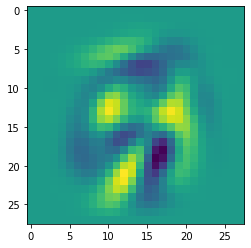

In [48]:
tmp = np.reshape(eigvec[9], (28,28)).astype(np.float32)
    
plt.imshow(tmp)